# Information Value

En esta notebook vamos a testear Information Value definido por Zanette & Montemurro.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from __future__ import division, print_function
import pandas as pd
import numpy as np
import nltk
import math
from nltk.corpus import stopwords, gutenberg 


def is_punctuation(c):
        return (len(c) == 1 and (c in "-.'?!,\":;()|-/")) or c == '""' or  len(c) == 1 or c == '--' or c == ').' or c == '.""' or c == ''
    
def tokenize(text, only_alpha = False, only_alphanum = True,  clean_stop_words = False, clean_punctuation = True):  
    """
    Tokeniza text sacando alfanuméricos, stopwords y puntuación de ser necesario
    """
    tokens = nltk.wordpunct_tokenize(text)
    tokens = [t for t in tokens if  (not clean_punctuation or not is_punctuation(t)) 
        and (not only_alpha or t.isalpha())
        and (not only_alphanum or t.isalnum())
        and (not clean_stop_words or t not in stopwords.words('english'))]          

    return tokens



def get_moby_dick_tokens():
    moby_dick = nltk.corpus.gutenberg.raw('melville-moby_dick.txt')
    tokens = tokenize(moby_dick, only_alphanum=True, clean_punctuation=True)
    return [token.lower() for token in tokens]


In [2]:
md_tokens = get_moby_dick_tokens()

fd = nltk.FreqDist(md_tokens)

In [3]:
from scipy.stats import entropy

window_size = 5000

def ocurrence_dataframe(tokenized_text, window_size):
    """
    Construye una matriz de ocurrencias dado un tamaño de ventana
    """
    freq = {}
    """
    N = Largo del texto
    P = Cantidad de ventanas
    """
    N = len(tokenized_text)
    P = int(math.ceil(N / window_size))

    for i in range(0, P):
        """
        Para cada ventana: hago un Fdist de la ventana, y lo sumo a las palabras que ya tenga
        """
        lower_bound, upper_bound = window_size * i, min(window_size* (i+1), N) 
        window = tokenized_text[lower_bound:upper_bound]
        window_fdist = nltk.FreqDist(window)

        for word in window_fdist:
            if word not in freq:
                freq[word] = [0] * P
                
            freq[word][i] = window_fdist[word]
            
    df = pd.DataFrame.from_dict(freq, orient="index")
    
    df["entropy"] = df.apply(entropy, axis=1, raw=True)
    df["total"] = df[range(P)].apply(sum, axis=1, raw=True)
    df["freq"] = df["total"] / len(tokenized_text)
    df["not_stop_word"] = df.index.map(lambda w: w not in stopwords.words('english'))
    
    return df

occurrence_df = ocurrence_dataframe(md_tokens, window_size)

occurrence_df.sort_values(by="entropy", inplace=True)

In [4]:
occurrence_df.iloc[:100]

0  1  2  3  4  5  6  7  8  9      ...        36  37  38  39  \
funereal        0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
dreamt          0  0  1  0  0  0  0  0  0  0      ...         0   0   0   0   
thickens        0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
ramparts        0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
spiralizations  0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
conflagration   0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
prating         0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
feegee          0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
aboriginalness  0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
overhung        0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
platters        0  0  0  0  1  0  0  0  0  0      ...         0   0   0   0   
repelling       0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
preparative     0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
fulller         1  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
pail            0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
oxygenated      0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
tasks           0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
normal          0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
discreet        0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
bestreaked      0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
thews           0  0  0  0  0  2  0  0  0  0      ...         0   0   0   0   
dugongs         0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
scrupulously    0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
sentence        1  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
overmanned      0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
poniards        0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
identify        0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
gauntleted      0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
1775            0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
1776            0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
...            .. .. .. .. .. .. .. .. .. ..      ...        ..  ..  ..  ..   
periodicalness  0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
blackest        0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
inquiringly     0  0  0  0  0  0  1  0  0  0      ...         0   0   0   0   
bordering       0  0  0  0  0  0  0  0  0  0      ...         0   0   0   1   
missive         0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
sylla           0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
submarine       0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
magazine        0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
crucifix        1  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
allotted        0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
unsay           0  1  0  0  0  0  0  0  0  0      ...         0   0   0   0   
nerve           0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
managers        0  1  0  0  0  0  0  0  0  0      ...         0   0   0   0   
wept            0  0  0  0  0  0  0  0  0  0      ...         0   0   1   0   
gleam           0  0  0  0  0  0  0  0  0  0      ...         0   0   1   0   
practices       0  0  0  0  1  0  0  0  0  0      ...         0   0   0   0   
smoker          0  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
uno             1  0  0  0  0  0  0  0  0  0      ...         0   0   0   0   
scorch          0  0  0  0  0  0  0  0  0  0      ...         0   

# Information Value

Observemos que acá el problema es que me quedan ordenadas primero las palabras con baja frecuencia: más aún, las que aparecen una vez están primeras que todos porque tienen entropía mínima.

In [5]:
import random

shuffled_text = random.shuffle(md_tokens)

shuffled_df = ocurrence_dataframe(md_tokens, window_size)

shuffled_df[shuffled_df.total > 10].iloc[:40]

0  1   2  3  4  5   6   7  8   9      ...        36  37  38  39  \
foul       0  0   1  0  0  1   0   0  1   0      ...         0   0   0   0   
four       2  2   1  2  1  2   2   1  4   4      ...         0   3   3   1   
hanging    1  0   1  2  0  1   3   1  0   0      ...         1   0   1   0   
lord       2  6   3  0  2  0   1   3  0   3      ...         3   1   0   4   
sinking    0  0   0  0  2  0   0   0  0   1      ...         2   0   0   0   
oceans     0  1   0  1  1  0   0   0  1   0      ...         2   0   0   0   
wooden     2  0   1  0  0  0   0   0  0   0      ...         1   3   0   1   
nigh       1  0   1  1  1  2   2   3  0   2      ...         2   1   0   1   
second     3  2   1  1  1  0   0   2  2   2      ...         1   1   3   1   
sailed     0  1   0  0  0  3   0   1  1   1      ...         2   0   0   3   
whaling    3  1   3  1  0  1   2   2  5   4      ...         1   6   2   6   
thunder    2  0   0  1  1  2   1   1  3   1      ...         0   2   0   2   
fingers    1  0   1  0  0  0   0   1  0   1      ...         0   1   1   0   
here       9  5  12  5  7  4  10   5  7  11      ...        11   9  13   8   
herd       0  0   0  1  0  0   0   0  1   0      ...         0   0   0   1   
substance  1  0   1  0  1  0   1   0  1   2      ...         1   1   1   0   
golden     1  1   0  0  1  0   0   1  0   0      ...         0   1   0   0   
brought    1  0   2  0  0  0   3   0  0   0      ...         2   1   1   1   
stern      1  1   0  2  2  1   2   1  1   0      ...         1   0   2   1   
spoke      0  0   0  0  0  0   0   1  0   0      ...         1   0   1   0   
cannibal   2  1   0  0  0  0   0   1  1   0      ...         0   1   0   0   
therefore  2  2   2  2  2  1   0   1  2   0      ...         2   1   2   2   
mystic     1  1   0  0  0  0   0   0  2   0      ...         0   1   0   0   
strike     1  1   0  0  0  0   0   2  0   0      ...         3   1   0   1   
holy       0  1   0  2  0  0   0   0  0   0      ...         0   0   0   0   
glass      2  0   0  0  0  0   1   1  0   1      ...         0   1   0   0   
hole       0  1   2  1  0  1   2   0  1   1      ...         0   1   2   0   
hold       3  1   1  2  1  2   3   4  0   3      ...         2   3   2   0   
locked     1  0   1  0  0  1   0   1  0   0      ...         0   0   0   0   
leaped     0  0   1  0  0  0   0   0  0   1      ...         1   0   1   0   
example    0  0   1  1  1  2   0   0  0   0      ...         0   1   1   0   
want       2  0   1  0  1  1   0   2  3   1      ...         0   0   0   0   
how        7  6   5  1  6  4   4  10  8  10      ...         5   9   9   2   
hot        0  0   0  0  0  0   1   0  2   0      ...         0   0   0   0   
wind       0  1   2  1  3  2   1   2  3   1      ...         1   2   2   2   
wine       0  0   0  0  1  0   0   0  0   0      ...         0   0   0   1   
fit        1  0   0  0  0  0   0   0  1   0      ...         0   0   0   1   
hidden     0  1   1  0  0  2   0   1  0   0      ...         1   0   1   0   
fin        0  0   0  1  1  0   1   0  0   1      ...         1   2   1   0   
silver     1  0   0  1  0  0   1   0  0   1      ...         1   1   1   0   

           40  41   entropy  total      freq  not_stop_word  
foul        0   0  2.145842     11  0.000053           True  
four        3   1  3.498149     74  0.000353           True  
hanging     0   0  2.692311     20  0.000095           True  
lord        2   1  3.333210     66  0.000315           True  
sinking     0   0  2.245035     13  0.000062           True  
oceans      0   0  2.512659     16  0.000076           True  
wooden      2   1  2.721692     27  0.000129           True  
nigh        1   3  3.244407     44  0.000210           True  
second      2   1  3.483906     59  0.000282           True  
sailed      0   0  2.998805     38  0.000181           True  
whaling     4   1  3.563283    131  0.000625           True  
thunder     0   0  3.014636     31  0.000148           True  
finger

In [6]:

occurrence_df["shuffled_entropy"] = shuffled_df["entropy"]

occurrence_df["information_value"] = occurrence_df.freq * abs(occurrence_df.shuffled_entropy - occurrence_df.entropy)

occurrence_df.sort_values("information_value", ascending=False, inplace=True)

occurrence_df.iloc[:40]

0    1    2    3    4    5    6    7    8    9  \
whale       76    9    1    9    5    9    2    7   26    8   
ahab         0    0    0    0    0    4   15   14    1   31   
queequeg     0    0   22    1   33   32   28   38    3    2   
is          63   34   20   66   36   18   14   19   40   23   
ye           5    4    6    6    3   21   17   40   25   11   
you         32   46   22    6   19   23   18   35   10   17   
thou         2    3    0    6    0   18   13   12    9    2   
me          16   35   49   12   40   20   39   21    9   30   
bildad       0    0    0    0    0    3   38   25   10    0   
stubb        0    0    0    0    0    0    0    1    9   23   
whales      22    2    1    1    1    1    2    1    5    5   
captain      4    0    0   12    7   19   34   30    9   10   
of         199  146  138  158  133  143  110  120  175  188   
jonah        2    3    0   47   10    0    0    0    0    0   
white        1    2    2    2    0    2    0    0    2    8   
peleg        0    0    0    0    0    8   31   26    8    0   
boat         5    1    0    4    1    4    1    3    7    1   
sperm        7    0    0    1    0    1    0    0    4    2   
the        333  304  268  368  275  280  226  268  296  325   
he          26   49   77   65   79   32   87   76   38   71   
starbuck     0    0    0    0    0    0    0    4   13    2   
fish         4    3    1    3    1    4    0    1    2    1   
sir          9    2    0    3    0   10    0    1    0    4   
pip          0    0    0    0    0    0    0    0    0    1   
cook         4    0    0    0    0    0    0    0    3    0   
said         5   13    7    1   10   14   28   51    3   10   
flask        0    0    0    0    0    0    0    0    2   14   
was         18   54   62   33   52   64   56   57   36   62   
steelkilt    0    0    0    0    0    0    0    0    0    0   
bed          0   14   27    1    8    4    5    1    0    1   
aye          0    0    0    3    1    2    3    6    2    3   
my           8   32   35   24   23    9   23   14   14   21   
boats        4    0    0    1    0    2    0    3    1    1   
his         43   38   85   65  108   55   75   64   70   54   
oh           1    1    0    5    1    1    3    7    4    2   
him         12   19   30   41   59   15   45   36   18   32   
thee         1    0    0    0    1    4    9    4    1    1   
leg          0    0    1    0    0    3    2    5    2   11   
in         130  102  103  102   86  100   69   77  117   80   
head        10    9   14    2   10    5    3    6    5    4   

                 ...           38   39   40   41   entropy  total      freq  \
whale            ...           10   25   30   32  3.437954   1226  0.005854   
ahab             ...           32   41   40   34  3.129364    511  0.002440   
queequeg         ...            3    1    0    2  2.680595    252  0.001203   
is               ...           13   23   30   16  3.592272   1725  0.008237   
ye               ...           16   11   21   19  3.230246    472  0.002254   
you              ...           13    3    0    2  3.480810    894  0.004269   
thou             ...           19    3    7   16  2.934329    271  0.001294   
me               ...           29   13   15   28  3.403535    633  0.003022   
bildad           ...            0    0    0    0  1.106762     76  0.000363   
stubb            ...            8    2   17   10  2.959690    257  0.001227   
whales           ...            1    0    1    0  3.018615    268  0.001280   
captain          ...           11    7    2    2  3.160791    329  0.001571   
of               ...          103  111  129   87  3.709943   6609  0.031557   
jonah            ...            0    0    0    0  1.433252     85  0.000406   
white            ...           10   17   12   10  3.150769    281  0.001342   
peleg            ...            0    0    0    0  1.271157     74  0.000353   
boat             ...           14   11   20   22  3.261636    336  0.001604   
sperm  

# Cálculo de Information Value sin usar un shuffle de texto

El cálculo hecho depende de un shuffle particular del texto. Según Zanette y Montemurro, hay una forma cerrada para la esperanza de la entropía de una palabra sobre un shuffle cualquiera de texto.

La forma cerrada es

\begin{equation}
    H(J| w) = -P \sum_{m=1}^{min(n, N/P)} p(m) \frac{m}{n} log \frac{m}{n}
\end{equation}

donde $N$ cantidad total de tokens del texto, $P$ "cantidad de capítulos" (asumiendo que todas las secciones tienen igual cantidad de tokens), $n$ la cantidad total de apariciones de $w$ en todo el texto. y $p(m)$ la función de densidad de una Hipergeométrica de Parámetros $N, n, N/P$ 

In [16]:
from scipy.stats import hypergeom



def exact_shuffled_entropy(word_series, no_tokens, window_size):
    """
    Calculates exact shuffled entropy 
    
    Parameters
    ----------
    
    word_series: pandas.Series
        row of a dataframe built with occurrence_dataframe function
    no_tokens: int
        Number of tokens (N) in text
    window_size: int
        Number of tokens per window
    """
    
    N = len(md_tokens)
    P = int(math.ceil(N / window_size))

    n = word_series.total
    
    

    hv = hypergeom(M=N, N=window_size, n=n)
    sum_range = xrange(1, min(int(n), window_size)+1)
    shuffled_entropy = 0
    pmfs = []
    for m in sum_range:
        p = hv.pmf(m)
        pmfs.append(p)
        shuffled_entropy+= hv.pmf(m) * (m/n) * np.log2(m/n)
    
    sum_of_pmfs = sum(pmfs)
    
    if sum_of_pmfs < 0.95:
        print("Hypergeometric with {} total balls, {} drawns, and {} black balls".format(N, window_size, n))
        print("Mean = {}".format(hv.mean()))
        print("sum of pmfs = {}".format(sum_of_pmfs))
    
    shuffled_entropy *= -P
    
    return shuffled_entropy

fn = lambda w: exact_shuffled_entropy(w, len(md_tokens), window_size)

occurrence_df["exact_shuffled_entropy"] = occurrence_df.apply(fn, axis=1)

Hypergeometric with 209433 total balls, 5000 drawns, and 85 black balls
Mean = 2.02928860304
sum of pmfs = 0.871820263293
Hypergeometric with 209433 total balls, 5000 drawns, and 76 black balls
Mean = 1.81442275095
sum of pmfs = 0.840668034267
Hypergeometric with 209433 total balls, 5000 drawns, and 108 black balls
Mean = 2.57839022504
sum of pmfs = 0.926490619054
Hypergeometric with 209433 total balls, 5000 drawns, and 74 black balls
Mean = 1.76667478382
sum of pmfs = 0.83277596597
Hypergeometric with 209433 total balls, 5000 drawns, and 113 black balls
Mean = 2.69776014286
sum of pmfs = 0.934860518857
Hypergeometric with 209433 total balls, 5000 drawns, and 74 black balls
Mean = 1.76667478382
sum of pmfs = 0.83277596597
Hypergeometric with 209433 total balls, 5000 drawns, and 120 black balls
Mean = 2.86487802782
sum of pmfs = 0.945002328118
Hypergeometric with 209433 total balls, 5000 drawns, and 114 black balls
Mean = 2.72163412643
sum of pmfs = 0.936416497212
Hypergeometric with 20

Hypergeometric with 209433 total balls, 5000 drawns, and 49 black balls
Mean = 1.16982519469
sum of pmfs = 0.693994760484
Hypergeometric with 209433 total balls, 5000 drawns, and 80 black balls
Mean = 1.90991868521
sum of pmfs = 0.855352564811
Hypergeometric with 209433 total balls, 5000 drawns, and 57 black balls
Mean = 1.36081706321
sum of pmfs = 0.747794438252
Hypergeometric with 209433 total balls, 5000 drawns, and 95 black balls
Mean = 2.26802843869
sum of pmfs = 0.899345581618
Hypergeometric with 209433 total balls, 5000 drawns, and 76 black balls
Mean = 1.81442275095
sum of pmfs = 0.840668034267
Hypergeometric with 209433 total balls, 5000 drawns, and 80 black balls
Mean = 1.90991868521
sum of pmfs = 0.855352564811
Hypergeometric with 209433 total balls, 5000 drawns, and 87 black balls
Mean = 2.07703657017
sum of pmfs = 0.877869966882
Hypergeometric with 209433 total balls, 5000 drawns, and 84 black balls
Mean = 2.00541461947
sum of pmfs = 0.868683968578
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 70 black balls
Mean = 1.67117884956
sum of pmfs = 0.815799987602
Hypergeometric with 209433 total balls, 5000 drawns, and 54 black balls
Mean = 1.28919511252
sum of pmfs = 0.728827673926
Hypergeometric with 209433 total balls, 5000 drawns, and 61 black balls
Mean = 1.45631299747
sum of pmfs = 0.771036455157
Hypergeometric with 209433 total balls, 5000 drawns, and 49 black balls
Mean = 1.16982519469
sum of pmfs = 0.693994760484
Hypergeometric with 209433 total balls, 5000 drawns, and 56 black balls
Mean = 1.33694307965
sum of pmfs = 0.741624331493
Hypergeometric with 209433 total balls, 5000 drawns, and 58 black balls
Mean = 1.38469104678
sum of pmfs = 0.753817228373
Hypergeometric with 209433 total balls, 5000 drawns, and 64 black balls
Mean = 1.52793494817
sum of pmfs = 0.787051508037
Hypergeometric with 209433 total balls, 5000 drawns, and 59 black balls
Mean = 1.40856503034
sum of pmfs = 0.759696220442
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 55 black balls
Mean = 1.31306909608
sum of pmfs = 0.735303306978
Hypergeometric with 209433 total balls, 5000 drawns, and 60 black balls
Mean = 1.43243901391
sum of pmfs = 0.765434845507
Hypergeometric with 209433 total balls, 5000 drawns, and 49 black balls
Mean = 1.16982519469
sum of pmfs = 0.693994760484
Hypergeometric with 209433 total balls, 5000 drawns, and 56 black balls
Mean = 1.33694307965
sum of pmfs = 0.741624331493
Hypergeometric with 209433 total balls, 5000 drawns, and 54 black balls
Mean = 1.28919511252
sum of pmfs = 0.728827673926
Hypergeometric with 209433 total balls, 5000 drawns, and 58 black balls
Mean = 1.38469104678
sum of pmfs = 0.753817228373
Hypergeometric with 209433 total balls, 5000 drawns, and 48 black balls
Mean = 1.14595121113
sum of pmfs = 0.686508760154
Hypergeometric with 209433 total balls, 5000 drawns, and 42 black balls
Mean = 1.00270730974
sum of pmfs = 0.637587118629
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 47 black balls
Mean = 1.12207722756
sum of pmfs = 0.67883966273
Hypergeometric with 209433 total balls, 5000 drawns, and 49 black balls
Mean = 1.16982519469
sum of pmfs = 0.693994760484
Hypergeometric with 209433 total balls, 5000 drawns, and 51 black balls
Mean = 1.21757316182
sum of pmfs = 0.708434847699
Hypergeometric with 209433 total balls, 5000 drawns, and 33 black balls
Mean = 0.78784145765
sum of pmfs = 0.549528287341
Hypergeometric with 209433 total balls, 5000 drawns, and 37 black balls
Mean = 0.883337391911
sum of pmfs = 0.591036944806
Hypergeometric with 209433 total balls, 5000 drawns, and 51 black balls
Mean = 1.21757316182
sum of pmfs = 0.708434847699
Hypergeometric with 209433 total balls, 5000 drawns, and 41 black balls
Mean = 0.978833326171
sum of pmfs = 0.62872148619
Hypergeometric with 209433 total balls, 5000 drawns, and 35 black balls
Mean = 0.83558942478
sum of pmfs = 0.570784000811
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 30 black balls
Mean = 0.716219506954
sum of pmfs = 0.515655271032
Hypergeometric with 209433 total balls, 5000 drawns, and 37 black balls
Mean = 0.883337391911
sum of pmfs = 0.591036944806
Hypergeometric with 209433 total balls, 5000 drawns, and 41 black balls
Mean = 0.978833326171
sum of pmfs = 0.62872148619
Hypergeometric with 209433 total balls, 5000 drawns, and 39 black balls
Mean = 0.931085359041
sum of pmfs = 0.610334417139
Hypergeometric with 209433 total balls, 5000 drawns, and 42 black balls
Mean = 1.00270730974
sum of pmfs = 0.637587118629
Hypergeometric with 209433 total balls, 5000 drawns, and 38 black balls
Mean = 0.907211375476
sum of pmfs = 0.600802247111
Hypergeometric with 209433 total balls, 5000 drawns, and 32 black balls
Mean = 0.763967474085
sum of pmfs = 0.538508974696
Hypergeometric with 209433 total balls, 5000 drawns, and 44 black balls
Mean = 1.05045527687
sum of pmfs = 0.654688462057
Hypergeometric with

Hypergeometric with 209433 total balls, 5000 drawns, and 34 black balls
Mean = 0.811715441215
sum of pmfs = 0.560284536539
Hypergeometric with 209433 total balls, 5000 drawns, and 32 black balls
Mean = 0.763967474085
sum of pmfs = 0.538508974696
Hypergeometric with 209433 total balls, 5000 drawns, and 20 black balls
Mean = 0.477479671303
sum of pmfs = 0.383251468056
Hypergeometric with 209433 total balls, 5000 drawns, and 29 black balls
Mean = 0.692345523389
sum of pmfs = 0.503807540071
Hypergeometric with 209433 total balls, 5000 drawns, and 35 black balls
Mean = 0.83558942478
sum of pmfs = 0.570784000811
Hypergeometric with 209433 total balls, 5000 drawns, and 36 black balls
Mean = 0.859463408345
sum of pmfs = 0.581032809267
Hypergeometric with 209433 total balls, 5000 drawns, and 38 black balls
Mean = 0.907211375476
sum of pmfs = 0.600802247111
Hypergeometric with 209433 total balls, 5000 drawns, and 21 black balls
Mean = 0.501353654868
sum of pmfs = 0.397977118792
Hypergeometric wi

Hypergeometric with 209433 total balls, 5000 drawns, and 33 black balls
Mean = 0.78784145765
sum of pmfs = 0.549528287341
Hypergeometric with 209433 total balls, 5000 drawns, and 24 black balls
Mean = 0.572975605564
sum of pmfs = 0.440078280316
Hypergeometric with 209433 total balls, 5000 drawns, and 30 black balls
Mean = 0.716219506954
sum of pmfs = 0.515655271032
Hypergeometric with 209433 total balls, 5000 drawns, and 29 black balls
Mean = 0.692345523389
sum of pmfs = 0.503807540071
Hypergeometric with 209433 total balls, 5000 drawns, and 27 black balls
Mean = 0.644597556259
sum of pmfs = 0.479235735909
Hypergeometric with 209433 total balls, 5000 drawns, and 29 black balls
Mean = 0.692345523389
sum of pmfs = 0.503807540071
Hypergeometric with 209433 total balls, 5000 drawns, and 32 black balls
Mean = 0.763967474085
sum of pmfs = 0.538508974696
Hypergeometric with 209433 total balls, 5000 drawns, and 30 black balls
Mean = 0.716219506954
sum of pmfs = 0.515655271032
Hypergeometric wi

Hypergeometric with 209433 total balls, 5000 drawns, and 23 black balls
Mean = 0.549101621998
sum of pmfs = 0.426382235044
Hypergeometric with 209433 total balls, 5000 drawns, and 29 black balls
Mean = 0.692345523389
sum of pmfs = 0.503807540071
Hypergeometric with 209433 total balls, 5000 drawns, and 22 black balls
Mean = 0.525227638433
sum of pmfs = 0.412351244261
Hypergeometric with 209433 total balls, 5000 drawns, and 26 black balls
Mean = 0.620723572694
sum of pmfs = 0.466497320483
Hypergeometric with 209433 total balls, 5000 drawns, and 20 black balls
Mean = 0.477479671303
sum of pmfs = 0.383251468056
Hypergeometric with 209433 total balls, 5000 drawns, and 24 black balls
Mean = 0.572975605564
sum of pmfs = 0.440078280316
Hypergeometric with 209433 total balls, 5000 drawns, and 28 black balls
Mean = 0.668471539824
sum of pmfs = 0.491670056655
Hypergeometric with 209433 total balls, 5000 drawns, and 27 black balls
Mean = 0.644597556259
sum of pmfs = 0.479235735909
Hypergeometric w

Hypergeometric with 209433 total balls, 5000 drawns, and 17 black balls
Mean = 0.405857720608
sum of pmfs = 0.336878362427
Hypergeometric with 209433 total balls, 5000 drawns, and 23 black balls
Mean = 0.549101621998
sum of pmfs = 0.426382235044
Hypergeometric with 209433 total balls, 5000 drawns, and 23 black balls
Mean = 0.549101621998
sum of pmfs = 0.426382235044
Hypergeometric with 209433 total balls, 5000 drawns, and 20 black balls
Mean = 0.477479671303
sum of pmfs = 0.383251468056
Hypergeometric with 209433 total balls, 5000 drawns, and 26 black balls
Mean = 0.620723572694
sum of pmfs = 0.466497320483
Hypergeometric with 209433 total balls, 5000 drawns, and 25 black balls
Mean = 0.596849589129
sum of pmfs = 0.453447374308
Hypergeometric with 209433 total balls, 5000 drawns, and 23 black balls
Mean = 0.549101621998
sum of pmfs = 0.426382235044
Hypergeometric with 209433 total balls, 5000 drawns, and 25 black balls
Mean = 0.596849589129
sum of pmfs = 0.453447374308
Hypergeometric w

Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.233412066082
Hypergeometric with 209433 total balls, 5000 drawns, and 21 black balls
Mean = 0.501353654868
sum of pmfs = 0.397977118792
Hypergeometric with 209433 total balls, 5000 drawns, and 18 black balls
Mean = 0.429731704173
sum of pmfs = 0.352711002588
Hypergeometric with 209433 total balls, 5000 drawns, and 18 black balls
Mean = 0.429731704173
sum of pmfs = 0.352711002588
Hypergeometric with 209433 total balls, 5000 drawns, and 25 black balls
Mean = 0.596849589129
sum of pmfs = 0.453447374308
Hypergeometric with 209433 total balls, 5000 drawns, and 24 black balls
Mean = 0.572975605564
sum of pmfs = 0.440078280316
Hypergeometric with 209433 total balls, 5000 drawns, and 21 black balls
Mean = 0.501353654868
sum of pmfs = 0.397977118792
Hypergeometric with 209433 total balls, 5000 drawns, and 19 black balls
Mean = 0.453605687738
sum of pmfs = 0.368165697673
Hypergeometric w

Hypergeometric with 209433 total balls, 5000 drawns, and 20 black balls
Mean = 0.477479671303
sum of pmfs = 0.383251468056
Hypergeometric with 209433 total balls, 5000 drawns, and 22 black balls
Mean = 0.525227638433
sum of pmfs = 0.412351244261
Hypergeometric with 209433 total balls, 5000 drawns, and 24 black balls
Mean = 0.572975605564
sum of pmfs = 0.440078280316
Hypergeometric with 209433 total balls, 5000 drawns, and 24 black balls
Mean = 0.572975605564
sum of pmfs = 0.440078280316
Hypergeometric with 209433 total balls, 5000 drawns, and 24 black balls
Mean = 0.572975605564
sum of pmfs = 0.440078280316
Hypergeometric with 209433 total balls, 5000 drawns, and 24 black balls
Mean = 0.572975605564
sum of pmfs = 0.440078280316
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 21 black balls
Mean = 0.501353654868
sum of pmfs = 0.397977118792
Hypergeometric w

Hypergeometric with 209433 total balls, 5000 drawns, and 19 black balls
Mean = 0.453605687738
sum of pmfs = 0.368165697673
Hypergeometric with 209433 total balls, 5000 drawns, and 19 black balls
Mean = 0.453605687738
sum of pmfs = 0.368165697673
Hypergeometric with 209433 total balls, 5000 drawns, and 19 black balls
Mean = 0.453605687738
sum of pmfs = 0.368165697673
Hypergeometric with 209433 total balls, 5000 drawns, and 23 black balls
Mean = 0.549101621998
sum of pmfs = 0.426382235044
Hypergeometric with 209433 total balls, 5000 drawns, and 20 black balls
Mean = 0.477479671303
sum of pmfs = 0.383251468056
Hypergeometric with 209433 total balls, 5000 drawns, and 20 black balls
Mean = 0.477479671303
sum of pmfs = 0.383251468056
Hypergeometric with 209433 total balls, 5000 drawns, and 18 black balls
Mean = 0.429731704173
sum of pmfs = 0.352711002588
Hypergeometric with 209433 total balls, 5000 drawns, and 18 black balls
Mean = 0.429731704173
sum of pmfs = 0.352711002588
Hypergeometric w

Hypergeometric with 209433 total balls, 5000 drawns, and 18 black balls
Mean = 0.429731704173
sum of pmfs = 0.352711002588
Hypergeometric with 209433 total balls, 5000 drawns, and 18 black balls
Mean = 0.429731704173
sum of pmfs = 0.352711002588
Hypergeometric with 209433 total balls, 5000 drawns, and 18 black balls
Mean = 0.429731704173
sum of pmfs = 0.352711002588
Hypergeometric with 209433 total balls, 5000 drawns, and 19 black balls
Mean = 0.453605687738
sum of pmfs = 0.368165697673
Hypergeometric with 209433 total balls, 5000 drawns, and 17 black balls
Mean = 0.405857720608
sum of pmfs = 0.336878362427
Hypergeometric with 209433 total balls, 5000 drawns, and 17 black balls
Mean = 0.405857720608
sum of pmfs = 0.336878362427
Hypergeometric with 209433 total balls, 5000 drawns, and 17 black balls
Mean = 0.405857720608
sum of pmfs = 0.336878362427
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.233412066082
Hypergeometric w

Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.251714535182
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 17 black balls
Mean = 0.405857720608
sum of pmfs = 0.336878362427
Hypergeometric with 209433 total balls, 5000 drawns, and 17 black balls
Mean = 0.405857720608
sum of pmfs = 0.336878362427
Hypergeometric with 209433 total balls, 5000 drawns, and 17 black balls
Mean = 0.405857720608
sum of pmfs = 0.336878362427
Hypergeometric with 209433 total balls, 5000 drawns, and 17 black balls
Mean = 0.405857720608
sum of pmfs = 0.336878362427
Hypergeometric w

sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.287019228554
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.287019228554
Hypergeometric with 209433 total balls, 5000 drawns, and 15 black balls
Mean = 0.358109753477
sum of pmfs = 0.304042057782
Hypergeometric with 209433 total balls, 5000 drawns, and 15 black balls
Mean = 0.358109753477
sum of pmfs = 0.304042057782
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.

Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.233412066082
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric w

Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.287019228554
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.287019228554
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.287019228554
Hypergeometric w

Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.320658536416
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.287019228554
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.287019228554
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.287019228554
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.287019228554
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.175775187581
Hypergeometric wi

Hypergeometric with 209433 total balls, 5000 drawns, and 13 black balls
Mean = 0.310361786347
sum of pmfs = 0.26958011369
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.251714535182
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.251714535182
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.251714535182
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.251714535182
Hypergeometric with 

Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.251714535182
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.251714535182
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.233412066082
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.233412066082
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.233412066082
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.233412066082
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.233412066082
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.233412066082
Hypergeometric w

Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.214662024957
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.214662024957
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.214662024957
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.214662024957
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.214662024957
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.214662024957
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.214662024957
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.214662024957
Hypergeometric w

Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.214662024957
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.214662024957
Hypergeometric with 209433 total balls, 5000 drawns, and 13 black balls
Mean = 0.310361786347
sum of pmfs = 0.26958011369
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 20

Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.233412066082
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.233412066082
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.233412066082
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.233412066082
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.233412066082
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.233412066082
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.233412066082
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.233412066082
Hypergeometric w

sum of pmfs = 0.214662024957
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.214662024957
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.214662024957
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.214662024957
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.214662024957
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.214662024957
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.214662024957
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.214662024957
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.

Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
su

sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.19545346

Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0

Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.175775187581
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.175775187581
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.175775187581
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.175775187581
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.175775187581
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.175775187581
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.175775187581
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.175775187581
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.195453468939
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 2094

Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
su

Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.175775187581
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.175775187581
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.175775187581
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.175775187581
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.175775187581
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.175775187581
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.175775187581
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.175775187581
Hypergeometric with 2094

sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of p

sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.13496323

Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 2094

sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.155615696817
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.15561569

sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of p

sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.11380573

sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.11380573

Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
su

sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.13496323

Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.134963231493
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeo

sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of p

sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of p

sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.11380573

Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.113805739081
Hypergeometric with 2094

sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of p

sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of p

sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of p

sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeo

sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of p

Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0921308725304
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0

Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0

Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0

sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeo

sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of p

Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0

sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeo

sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0699259826097
Hypergeo

sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeo

sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of p

sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of p

Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0

Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeo

sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of p

Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeo

Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0

Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeo

Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0471781112896
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeo

Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeo

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeo

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeo

Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeo

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeo

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeo

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeo

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeo

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeo

Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeo

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeo

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0238739835601
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Bueno,hay algunas cosas raras. Pueden deberse a errores numéricos! Observemos que las sumas de las pmfs ni siquiera dan cerca de 1...


Veamos que este cálculo no cambia nada sustancialmente. Hagamos un histograma de las diferencias

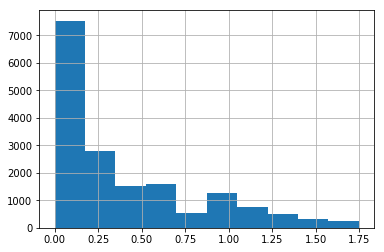

In [8]:
diff = (occurrence_df["exact_shuffled_entropy"] - occurrence_df["shuffled_entropy"])

diff.hist();

In [9]:
occurrence_df["exact_information_value"] = occurrence_df.freq *\
    abs(occurrence_df.exact_shuffled_entropy - occurrence_df.entropy)

occurrence_df.sort_values("exact_information_value", ascending=False, inplace=True)

In [10]:
occurrence_df.iloc[:50]

0    1    2    3    4    5    6    7    8    9  \
the    333  304  268  368  275  280  226  268  296  325   
of     199  146  138  158  133  143  110  120  175  188   
and    157  166  187  151  190  168  173  183  152  124   
to     126  105  121  105  147  124  138  121  100  117   
in     130  102  103  102   86  100   69   77  117   80   
that    58   80   59   73   60   81   83   73   77   85   
his     43   38   85   65  108   55   75   64   70   54   
it      47   73   80   36   41   58   64   52   48   76   
he      26   49   77   65   79   32   87   76   38   71   
is      63   34   20   66   36   18   14   19   40   23   
but     23   43   62   48   37   42   62   43   44   48   
as      41   31   49   33   39   33   38   26   47   39   
with    36   57   35   41   42   46   40   45   38   45   
was     18   54   62   33   52   64   56   57   36   62   
for     32   39   30   49   36   48   41   38   40   37   
all     27   28   36   43   29   34   46   49   53   38   
whale   76    9    1    9    5    9    2    7   26    8   
this    22   46   30   42   39   22   23   27   28   24   
at      18   31   59   24   44   33   38   37   31   29   
by      35   18   17   29   29   27   12   12   19   29   
not     17   25   32   38   29   28   43   23   23   26   
him     12   19   30   41   59   15   45   36   18   32   
from    24   32   20   29   26   28   19   17   25   29   
on      26   33   33   19   23   29   28   38   15   27   
so      13   27   17   18   22   23   33   13   25   25   
be      18   38   29   12   29   15   37   32   33   25   
you     32   46   22    6   19   23   18   35   10   17   
one     21   28   20   16   16   21   25   14   16   16   
there   29   23   23   22   23   27   23   26   21   24   
had     12   14   28   18   23   17   36   22   11   21   
now      9   18   21   18   20   19   13   17   10   22   
have    20   14   15    9   15   16   22   19   25   11   
me      16   35   49   12   40   20   39   21    9   30   
or      34    7   21    9   14   19   12   15   11   18   
were    13   14   20   11   26   13    8   18   17   21   
ahab     0    0    0    0    0    4   15   14    1   31   
they    27   15   10   22   10   16    9   13   12   15   
which   25   13    9   13   12    9    6   12   23   18   
like    12   14   15   20   18   20   14    8   12   23   
my       8   32   35   24   23    9   23   14   14   21   
their   19   10    3   14   11   12    4    3   11   13   
what    14   21   17   18   15   25   26   26   12   27   
then     5    8   21   12   24   16   18   25   11   13   
are     15   10    3   16    4   15    6   15   10    9   
some    20   11   11    4   12    9    7   16   13   15   
when     9    9   14   17   17   10   15   20    8   18   
ye       5    4    6    6    3   21   17   40   25   11   
an       9   20   12    8    9   20   15    7   16   19   
no      10   21   16   18   18   14   25   23   25   18   
upon    13   15    8   20   17   14    9   19   12   15   

                ...              40   41   entropy  total      freq  \
the             ...             364  352  3.726940  14431  0.068905   
of              ...             129   87  3.709943   6609  0.031557   
and             ...             165  149  3.729945   6430  0.030702   
to              ...             107   90  3.730306   4625  0.022083   
in              ...              70   67  3.715654   4172  0.019920   
that            ...              69   58  3.723710   3085  0.014730   
his             ...              61   38  3.694612   2530  0.012080   
it              ...              48   49  3.711352   2522  0.012042   
he              ...              48   47  3.655996   1896  0.009053   
is              ...              30   16  3.592272   1725  0.008237   
but             ...              42   49  3.718035   1818  0.008681   
as              ...              58   48  3.715787   1741  0.008313   
with            ...              22   29  3.722670   1722  0.008222   
was  

El orden da ligeramente distinto... y además podemos ver que la diferencia siempre es en favor del promedio. ¿Estará bien la cuenta?

# Lo mismo, pero con una aproximación a la hipergeométrica



In [18]:
from scipy.stats import poisson

def poisson_approx(k, M, n, N):
    return poisson.pmf(k, mu=(n*N)/float(M))


def poisson_shuffled_entropy(word_series, no_tokens, window_size):
    """
    Calculates exact shuffled entropy 
    
    Parameters
    ----------
    
    word_series: pandas.Series
        row of a dataframe built with occurrence_dataframe function
    no_tokens: int
        Number of tokens (N) in text
    window_size: int
        Number of tokens per window
    """
    
    N = len(md_tokens)
    P = int(math.ceil(N / window_size))

    n = word_series.total
    
    

    hv = hypergeom(M=N, N=window_size, n=n)
    sum_range = xrange(1, min(int(n), window_size)+1)
    shuffled_entropy = 0
    pmfs = []
    for m in sum_range:
        p = poisson_approx(m, M=N, N=window_size, n=n)
        pmfs.append(p)
        shuffled_entropy+= hv.pmf(m) * (m/n) * np.log2(m/n)
    
    sum_of_pmfs = sum(pmfs)
    
    if sum_of_pmfs < 0.95:
        print("Hypergeometric with {} total balls, {} drawns, and {} black balls".format(N, window_size, n))
        print("Mean = {}".format(hv.mean()))
        print("sum of pmfs = {}".format(sum_of_pmfs))
    
    shuffled_entropy *= -P
    
    return shuffled_entropy

fn = lambda w: poisson_shuffled_entropy(w, len(md_tokens), window_size)

occurrence_df["poisson_shuffled_entropy"] = occurrence_df.apply(fn, axis=1)

Hypergeometric with 209433 total balls, 5000 drawns, and 85 black balls
Mean = 2.02928860304
sum of pmfs = 0.868571013919
Hypergeometric with 209433 total balls, 5000 drawns, and 76 black balls
Mean = 1.81442275095
sum of pmfs = 0.837068066447
Hypergeometric with 209433 total balls, 5000 drawns, and 108 black balls
Mean = 2.57839022504
sum of pmfs = 0.92410391865
Hypergeometric with 209433 total balls, 5000 drawns, and 74 black balls
Mean = 1.76667478382
sum of pmfs = 0.829099674428
Hypergeometric with 209433 total balls, 5000 drawns, and 113 black balls
Mean = 2.69776014286
sum of pmfs = 0.932643787803
Hypergeometric with 209433 total balls, 5000 drawns, and 74 black balls
Mean = 1.76667478382
sum of pmfs = 0.829099674428
Hypergeometric with 209433 total balls, 5000 drawns, and 120 black balls
Mean = 2.86487802782
sum of pmfs = 0.943009918087
Hypergeometric with 209433 total balls, 5000 drawns, and 114 black balls
Mean = 2.72163412643
sum of pmfs = 0.934232805344
Hypergeometric with 2

Hypergeometric with 209433 total balls, 5000 drawns, and 76 black balls
Mean = 1.81442275095
sum of pmfs = 0.837068066447
Hypergeometric with 209433 total balls, 5000 drawns, and 80 black balls
Mean = 1.90991868521
sum of pmfs = 0.85190757179
Hypergeometric with 209433 total balls, 5000 drawns, and 87 black balls
Mean = 2.07703657017
sum of pmfs = 0.874699016778
Hypergeometric with 209433 total balls, 5000 drawns, and 84 black balls
Mean = 2.00541461947
sum of pmfs = 0.865395525512
Hypergeometric with 209433 total balls, 5000 drawns, and 82 black balls
Mean = 1.95766665234
sum of pmfs = 0.858812523661
Hypergeometric with 209433 total balls, 5000 drawns, and 89 black balls
Mean = 2.1247845373
sum of pmfs = 0.880541295611
Hypergeometric with 209433 total balls, 5000 drawns, and 91 black balls
Mean = 2.17253250443
sum of pmfs = 0.886111172575
Hypergeometric with 209433 total balls, 5000 drawns, and 80 black balls
Mean = 1.90991868521
sum of pmfs = 0.85190757179
Hypergeometric with 209433 

Hypergeometric with 209433 total balls, 5000 drawns, and 56 black balls
Mean = 1.33694307965
sum of pmfs = 0.737352665376
Hypergeometric with 209433 total balls, 5000 drawns, and 65 black balls
Mean = 1.55180893173
sum of pmfs = 0.788135621216
Hypergeometric with 209433 total balls, 5000 drawns, and 64 black balls
Mean = 1.52793494817
sum of pmfs = 0.783016713288
Hypergeometric with 209433 total balls, 5000 drawns, and 70 black balls
Mean = 1.67117884956
sum of pmfs = 0.811974718581
Hypergeometric with 209433 total balls, 5000 drawns, and 65 black balls
Mean = 1.55180893173
sum of pmfs = 0.788135621216
Hypergeometric with 209433 total balls, 5000 drawns, and 67 black balls
Mean = 1.59955689887
sum of pmfs = 0.798014001606
Hypergeometric with 209433 total balls, 5000 drawns, and 70 black balls
Mean = 1.67117884956
sum of pmfs = 0.811974718581
Hypergeometric with 209433 total balls, 5000 drawns, and 69 black balls
Mean = 1.647304866
sum of pmfs = 0.807431793012
Hypergeometric with 209433

Hypergeometric with 209433 total balls, 5000 drawns, and 42 black balls
Mean = 1.00270730974
sum of pmfs = 0.633115175446
Hypergeometric with 209433 total balls, 5000 drawns, and 36 black balls
Mean = 0.859463408345
sum of pmfs = 0.576610791509
Hypergeometric with 209433 total balls, 5000 drawns, and 55 black balls
Mean = 1.31306909608
sum of pmfs = 0.731006777828
Hypergeometric with 209433 total balls, 5000 drawns, and 34 black balls
Mean = 0.811715441215
sum of pmfs = 0.555904407462
Hypergeometric with 209433 total balls, 5000 drawns, and 47 black balls
Mean = 1.12207722756
sum of pmfs = 0.674397259318
Hypergeometric with 209433 total balls, 5000 drawns, and 53 black balls
Mean = 1.26532112895
sum of pmfs = 0.717851324518
Hypergeometric with 209433 total balls, 5000 drawns, and 55 black balls
Mean = 1.31306909608
sum of pmfs = 0.731006777828
Hypergeometric with 209433 total balls, 5000 drawns, and 56 black balls
Mean = 1.33694307965
sum of pmfs = 0.737352665376
Hypergeometric with 20

Hypergeometric with 209433 total balls, 5000 drawns, and 32 black balls
Mean = 0.763967474085
sum of pmfs = 0.534185351549
Hypergeometric with 209433 total balls, 5000 drawns, and 44 black balls
Mean = 1.05045527687
sum of pmfs = 0.650221533189
Hypergeometric with 209433 total balls, 5000 drawns, and 49 black balls
Mean = 1.16982519469
sum of pmfs = 0.689578800204
Hypergeometric with 209433 total balls, 5000 drawns, and 20 black balls
Mean = 0.477479671303
sum of pmfs = 0.379655103729
Hypergeometric with 209433 total balls, 5000 drawns, and 37 black balls
Mean = 0.883337391911
sum of pmfs = 0.586599074056
Hypergeometric with 209433 total balls, 5000 drawns, and 36 black balls
Mean = 0.859463408345
sum of pmfs = 0.576610791509
Hypergeometric with 209433 total balls, 5000 drawns, and 47 black balls
Mean = 1.12207722756
sum of pmfs = 0.674397259318
Hypergeometric with 209433 total balls, 5000 drawns, and 46 black balls
Mean = 1.098203244
sum of pmfs = 0.666530290553
Hypergeometric with 20

sum of pmfs = 0.633115175446
Hypergeometric with 209433 total balls, 5000 drawns, and 38 black balls
Mean = 0.907211375476
sum of pmfs = 0.596351720488
Hypergeometric with 209433 total balls, 5000 drawns, and 32 black balls
Mean = 0.763967474085
sum of pmfs = 0.534185351549
Hypergeometric with 209433 total balls, 5000 drawns, and 44 black balls
Mean = 1.05045527687
sum of pmfs = 0.650221533189
Hypergeometric with 209433 total balls, 5000 drawns, and 33 black balls
Mean = 0.78784145765
sum of pmfs = 0.545174503445
Hypergeometric with 209433 total balls, 5000 drawns, and 42 black balls
Mean = 1.00270730974
sum of pmfs = 0.633115175446
Hypergeometric with 209433 total balls, 5000 drawns, and 37 black balls
Mean = 0.883337391911
sum of pmfs = 0.586599074056
Hypergeometric with 209433 total balls, 5000 drawns, and 37 black balls
Mean = 0.883337391911
sum of pmfs = 0.586599074056
Hypergeometric with 209433 total balls, 5000 drawns, and 31 black balls
Mean = 0.74009349052
sum of pmfs = 0.5229

Hypergeometric with 209433 total balls, 5000 drawns, and 36 black balls
Mean = 0.859463408345
sum of pmfs = 0.576610791509
Hypergeometric with 209433 total balls, 5000 drawns, and 34 black balls
Mean = 0.811715441215
sum of pmfs = 0.555904407462
Hypergeometric with 209433 total balls, 5000 drawns, and 34 black balls
Mean = 0.811715441215
sum of pmfs = 0.555904407462
Hypergeometric with 209433 total balls, 5000 drawns, and 38 black balls
Mean = 0.907211375476
sum of pmfs = 0.596351720488
Hypergeometric with 209433 total balls, 5000 drawns, and 33 black balls
Mean = 0.78784145765
sum of pmfs = 0.545174503445
Hypergeometric with 209433 total balls, 5000 drawns, and 33 black balls
Mean = 0.78784145765
sum of pmfs = 0.545174503445
Hypergeometric with 209433 total balls, 5000 drawns, and 34 black balls
Mean = 0.811715441215
sum of pmfs = 0.555904407462
Hypergeometric with 209433 total balls, 5000 drawns, and 19 black balls
Mean = 0.453605687738
sum of pmfs = 0.364666796466
Hypergeometric wit

Hypergeometric with 209433 total balls, 5000 drawns, and 33 black balls
Mean = 0.78784145765
sum of pmfs = 0.545174503445
Hypergeometric with 209433 total balls, 5000 drawns, and 29 black balls
Mean = 0.692345523389
sum of pmfs = 0.499599010708
Hypergeometric with 209433 total balls, 5000 drawns, and 24 black balls
Mean = 0.572975605564
sum of pmfs = 0.436154840778
Hypergeometric with 209433 total balls, 5000 drawns, and 26 black balls
Mean = 0.620723572694
sum of pmfs = 0.462444663523
Hypergeometric with 209433 total balls, 5000 drawns, and 26 black balls
Mean = 0.620723572694
sum of pmfs = 0.462444663523
Hypergeometric with 209433 total balls, 5000 drawns, and 30 black balls
Mean = 0.716219506954
sum of pmfs = 0.511404097771
Hypergeometric with 209433 total balls, 5000 drawns, and 27 black balls
Mean = 0.644597556259
sum of pmfs = 0.475126268244
Hypergeometric with 209433 total balls, 5000 drawns, and 15 black balls
Mean = 0.358109753477
sum of pmfs = 0.301003646484
Hypergeometric wi

Hypergeometric with 209433 total balls, 5000 drawns, and 28 black balls
Mean = 0.668471539824
sum of pmfs = 0.487508698002
Hypergeometric with 209433 total balls, 5000 drawns, and 25 black balls
Mean = 0.596849589129
sum of pmfs = 0.449456655397
Hypergeometric with 209433 total balls, 5000 drawns, and 31 black balls
Mean = 0.74009349052
sum of pmfs = 0.522930688022
Hypergeometric with 209433 total balls, 5000 drawns, and 27 black balls
Mean = 0.644597556259
sum of pmfs = 0.475126268244
Hypergeometric with 209433 total balls, 5000 drawns, and 28 black balls
Mean = 0.668471539824
sum of pmfs = 0.487508698002
Hypergeometric with 209433 total balls, 5000 drawns, and 23 black balls
Mean = 0.549101621998
sum of pmfs = 0.422531637709
Hypergeometric with 209433 total balls, 5000 drawns, and 22 black balls
Mean = 0.525227638433
sum of pmfs = 0.408579281044
Hypergeometric with 209433 total balls, 5000 drawns, and 30 black balls
Mean = 0.716219506954
sum of pmfs = 0.511404097771
Hypergeometric wi

Hypergeometric with 209433 total balls, 5000 drawns, and 25 black balls
Mean = 0.596849589129
sum of pmfs = 0.449456655397
Hypergeometric with 209433 total balls, 5000 drawns, and 24 black balls
Mean = 0.572975605564
sum of pmfs = 0.436154840778
Hypergeometric with 209433 total balls, 5000 drawns, and 15 black balls
Mean = 0.358109753477
sum of pmfs = 0.301003646484
Hypergeometric with 209433 total balls, 5000 drawns, and 27 black balls
Mean = 0.644597556259
sum of pmfs = 0.475126268244
Hypergeometric with 209433 total balls, 5000 drawns, and 27 black balls
Mean = 0.644597556259
sum of pmfs = 0.475126268244
Hypergeometric with 209433 total balls, 5000 drawns, and 28 black balls
Mean = 0.668471539824
sum of pmfs = 0.487508698002
Hypergeometric with 209433 total balls, 5000 drawns, and 18 black balls
Mean = 0.429731704173
sum of pmfs = 0.349316352986
Hypergeometric with 209433 total balls, 5000 drawns, and 20 black balls
Mean = 0.477479671303
sum of pmfs = 0.379655103729
Hypergeometric w

Hypergeometric with 209433 total balls, 5000 drawns, and 22 black balls
Mean = 0.525227638433
sum of pmfs = 0.408579281044
Hypergeometric with 209433 total balls, 5000 drawns, and 19 black balls
Mean = 0.453605687738
sum of pmfs = 0.364666796466
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.28411502181
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 21 black balls
Mean = 0.501353654868
sum of pmfs = 0.39428981802
Hypergeometric with 20

sum of pmfs = 0.317493847316
Hypergeometric with 209433 total balls, 5000 drawns, and 21 black balls
Mean = 0.501353654868
sum of pmfs = 0.39428981802
Hypergeometric with 209433 total balls, 5000 drawns, and 21 black balls
Mean = 0.501353654868
sum of pmfs = 0.39428981802
Hypergeometric with 209433 total balls, 5000 drawns, and 19 black balls
Mean = 0.453605687738
sum of pmfs = 0.364666796466
Hypergeometric with 209433 total balls, 5000 drawns, and 19 black balls
Mean = 0.453605687738
sum of pmfs = 0.364666796466
Hypergeometric with 209433 total balls, 5000 drawns, and 18 black balls
Mean = 0.429731704173
sum of pmfs = 0.349316352986
Hypergeometric with 209433 total balls, 5000 drawns, and 15 black balls
Mean = 0.358109753477
sum of pmfs = 0.301003646484
Hypergeometric with 209433 total balls, 5000 drawns, and 21 black balls
Mean = 0.501353654868
sum of pmfs = 0.39428981802
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.284

Hypergeometric with 209433 total balls, 5000 drawns, and 17 black balls
Mean = 0.405857720608
sum of pmfs = 0.333595023625
Hypergeometric with 209433 total balls, 5000 drawns, and 18 black balls
Mean = 0.429731704173
sum of pmfs = 0.349316352986
Hypergeometric with 209433 total balls, 5000 drawns, and 15 black balls
Mean = 0.358109753477
sum of pmfs = 0.301003646484
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.317493847316
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.28411502181
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 20 black balls
Mean = 0.477479671303
sum of pmfs = 0.379655103729
Hypergeometric with

Hypergeometric with 209433 total balls, 5000 drawns, and 18 black balls
Mean = 0.429731704173
sum of pmfs = 0.349316352986
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.317493847316
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.317493847316
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.317493847316
Hypergeometric with 209433 total balls, 5000 drawns, and 16 black balls
Mean = 0.381983737042
sum of pmfs = 0.317493847316
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.28411502181
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.28411502181
Hypergeometric with 209433 total balls, 5000 drawns, and 20 black balls
Mean = 0.477479671303
sum of pmfs = 0.379655103729
Hypergeometric wit

Hypergeometric with 209433 total balls, 5000 drawns, and 18 black balls
Mean = 0.429731704173
sum of pmfs = 0.349316352986
Hypergeometric with 209433 total balls, 5000 drawns, and 18 black balls
Mean = 0.429731704173
sum of pmfs = 0.349316352986
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.24910376268
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.24910376268
Hypergeometric with 209433 total balls, 5000 drawns, and 17 black balls
Mean = 0.405857720608
sum of pmfs = 0.333595023625
Hypergeometric with 209433 total balls, 5000 drawns, and 17 black balls
Mean = 0.405857720608
sum of pmfs = 0.333595023625
Hypergeometric with 209433 total balls, 5000 drawns, and 15 black balls
Mean = 0.358109753477
sum of pmfs = 0.301003646484
Hypergeometric with 209433 total balls, 5000 drawns, and 15 black balls
Mean = 0.358109753477
sum of pmfs = 0.301003646484
Hypergeometric wit

sum of pmfs = 0.28411502181
Hypergeometric with 209433 total balls, 5000 drawns, and 15 black balls
Mean = 0.358109753477
sum of pmfs = 0.301003646484
Hypergeometric with 209433 total balls, 5000 drawns, and 15 black balls
Mean = 0.358109753477
sum of pmfs = 0.301003646484
Hypergeometric with 209433 total balls, 5000 drawns, and 15 black balls
Mean = 0.358109753477
sum of pmfs = 0.301003646484
Hypergeometric with 209433 total balls, 5000 drawns, and 15 black balls
Mean = 0.358109753477
sum of pmfs = 0.301003646484
Hypergeometric with 209433 total balls, 5000 drawns, and 15 black balls
Mean = 0.358109753477
sum of pmfs = 0.301003646484
Hypergeometric with 209433 total balls, 5000 drawns, and 15 black balls
Mean = 0.358109753477
sum of pmfs = 0.301003646484
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.21

sum of pmfs = 0.28411502181
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.28411502181
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.28411502181
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.28411502181
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.28411502181
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.28411502181
Hypergeometric with 209433 total balls, 5000 drawns, and 13 black balls
Mean = 0.310361786347
sum of pmfs = 0.266818346876
Hypergeometric with 209433 total balls, 5000 drawns, and 13 black balls
Mean = 0.310361786347
sum of pmfs = 0.266818346876
Hypergeometric with 209433 total balls, 5000 drawns, and 13 black balls
Mean = 0.310361786347
sum of pmfs = 0.266818

sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 14 black balls
Mean = 0.334235769912
sum of pmfs = 0.28411502

Hypergeometric with 209433 total balls, 5000 drawns, and 13 black balls
Mean = 0.310361786347
sum of pmfs = 0.266818346876
Hypergeometric with 209433 total balls, 5000 drawns, and 13 black balls
Mean = 0.310361786347
sum of pmfs = 0.266818346876
Hypergeometric with 209433 total balls, 5000 drawns, and 13 black balls
Mean = 0.310361786347
sum of pmfs = 0.266818346876
Hypergeometric with 209433 total balls, 5000 drawns, and 13 black balls
Mean = 0.310361786347
sum of pmfs = 0.266818346876
Hypergeometric with 209433 total balls, 5000 drawns, and 13 black balls
Mean = 0.310361786347
sum of pmfs = 0.266818346876
Hypergeometric with 209433 total balls, 5000 drawns, and 13 black balls
Mean = 0.310361786347
sum of pmfs = 0.266818346876
Hypergeometric with 209433 total balls, 5000 drawns, and 13 black balls
Mean = 0.310361786347
sum of pmfs = 0.266818346876
Hypergeometric with 209433 total balls, 5000 drawns, and 13 black balls
Mean = 0.310361786347
sum of pmfs = 0.266818346876
Hypergeometric w

Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.24910376268
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.24910376268
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.24910376268
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.24910376268
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.24910376268
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.24910376268
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.24910376268
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric w

sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.24910376268
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.24910376268
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.24910376268
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.24910376268
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.24910376268
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.24910376268
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.24910376268
Hypergeometric with 209433 total balls, 5000 drawns, and 12 black balls
Mean = 0.286487802782
sum of pmfs = 0.2491037

Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with

Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric with 209433 total balls, 5000 drawns, and 10 black balls
Mean = 0.238739835651
sum of pmfs = 0.212380233697
Hypergeometric w

Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 11 black balls
Mean = 0.262613819217
sum of pmfs = 0.23096117201
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 209433 total balls, 5000 drawns, and 9 black balls
Mean = 0.214865852086
sum of pmfs = 0.193350356714
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeo

sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.17386069

Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 2094

sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.13345730

Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 209433 total balls, 5000 drawns, and 8 black balls
Mean = 0.190991868521
sum of pmfs = 0.173860694141
Hypergeometric with 2094

sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of p

sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.13345730

sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.13345730

Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
sum of pmfs = 0.153900136974
Hypergeometric with 209433 total balls, 5000 drawns, and 7 black balls
Mean = 0.167117884956
su

sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of p

sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.11252055

Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 209433 total balls, 5000 drawns, and 6 black balls
Mean = 0.143243901391
sum of pmfs = 0.133457307632
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 2094

Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 2094

sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.112520550806
Hypergeometric with 209433 total balls, 5000 drawns, and 5 black balls
Mean = 0.119369917826
sum of pmfs = 0.11252055

Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeo

sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of p

sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of p

Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0

Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeometric with 209433 total balls, 5000 drawns, and 4 black balls
Mean = 0.0954959342606
sum of pmfs = 0.0910778817882
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeo

Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0

Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0

Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeo

Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0

sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of p

sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of p

sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeo

Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0

Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 3 black balls
Mean = 0.0716219506954
sum of pmfs = 0.0691162156999
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeo

sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of p

sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of p

sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of p

sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of p

Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0

sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of p

Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0

sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeo

Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0

sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeo

sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeometric with 209433 total balls, 5000 drawns, and 2 black balls
Mean = 0.0477479671303
sum of pmfs = 0.0466084559033
Hypergeo

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeo

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of pmfs = 0.0233107663442
Hypergeometric with 209433 total balls, 5000 drawns, and 1 black balls
Mean = 0.0238739835651
sum of p

In [19]:
occurrence_df["poisson_information_value"] = occurrence_df.freq *\
    abs(occurrence_df.poisson_shuffled_entropy - occurrence_df.entropy)

occurrence_df.sort_values("poisson_information_value", ascending=False, inplace=True)

occurrence_df.iloc[:40]

0    1    2    3    4    5    6    7    8    9  \
the    333  304  268  368  275  280  226  268  296  325   
of     199  146  138  158  133  143  110  120  175  188   
and    157  166  187  151  190  168  173  183  152  124   
to     126  105  121  105  147  124  138  121  100  117   
in     130  102  103  102   86  100   69   77  117   80   
that    58   80   59   73   60   81   83   73   77   85   
his     43   38   85   65  108   55   75   64   70   54   
it      47   73   80   36   41   58   64   52   48   76   
he      26   49   77   65   79   32   87   76   38   71   
is      63   34   20   66   36   18   14   19   40   23   
but     23   43   62   48   37   42   62   43   44   48   
as      41   31   49   33   39   33   38   26   47   39   
with    36   57   35   41   42   46   40   45   38   45   
was     18   54   62   33   52   64   56   57   36   62   
for     32   39   30   49   36   48   41   38   40   37   
all     27   28   36   43   29   34   46   49   53   38   
whale   76    9    1    9    5    9    2    7   26    8   
this    22   46   30   42   39   22   23   27   28   24   
at      18   31   59   24   44   33   38   37   31   29   
by      35   18   17   29   29   27   12   12   19   29   
not     17   25   32   38   29   28   43   23   23   26   
him     12   19   30   41   59   15   45   36   18   32   
from    24   32   20   29   26   28   19   17   25   29   
on      26   33   33   19   23   29   28   38   15   27   
so      13   27   17   18   22   23   33   13   25   25   
be      18   38   29   12   29   15   37   32   33   25   
you     32   46   22    6   19   23   18   35   10   17   
one     21   28   20   16   16   21   25   14   16   16   
there   29   23   23   22   23   27   23   26   21   24   
had     12   14   28   18   23   17   36   22   11   21   
now      9   18   21   18   20   19   13   17   10   22   
have    20   14   15    9   15   16   22   19   25   11   
me      16   35   49   12   40   20   39   21    9   30   
or      34    7   21    9   14   19   12   15   11   18   
were    13   14   20   11   26   13    8   18   17   21   
ahab     0    0    0    0    0    4   15   14    1   31   
they    27   15   10   22   10   16    9   13   12   15   
which   25   13    9   13   12    9    6   12   23   18   
like    12   14   15   20   18   20   14    8   12   23   
my       8   32   35   24   23    9   23   14   14   21   

                 ...               entropy  total      freq  not_stop_word  \
the              ...              3.726940  14431  0.068905          False   
of               ...              3.709943   6609  0.031557          False   
and              ...              3.729945   6430  0.030702          False   
to               ...              3.730306   4625  0.022083          False   
in               ...              3.715654   4172  0.019920          False   
that             ...              3.723710   3085  0.014730          False   
his              ...              3.694612   2530  0.012080          False   
it               ...              3.711352   2522  0.012042          False   
he               ...              3.655996   1896  0.009053          False   
is               ...              3.592272   1725  0.008237          False   
but              ...              3.718035   1818  0.008681          False   
as               ...              3.715787   1741  0.008313          False   
with             ...              3.722670   1722  0.008222          False   
was              ...              3.659772   1644  0.007850          False   
for              ...              3.715243   1617  0.007721          False   
all              ...              3.713244   1526  0.007286          False   
whale            ...              3.437954   1226  0.005854           True   
this             ...              3.698229   1394  0.006656          False   
at               ...              3.701845   1319  0.006298          False   
by               ...         

# En nuestro caso...


In [11]:
import re
from scipy.stats import entropy

df = pd.read_csv("../contrastes/provincias.csv", quotechar="\"", decimal=",")

df = df.set_index("palabra")


fnorm_vars = [c for c in df.columns if re.match(r'fnorm_.*', c)]
cant_palabras = [c for c in df.columns if re.match(r'.*Palabras', c)]


In [12]:
"""
Método que calcula la entropía de una palabra (usando df)
"""

import math


def w_entropy(df, word):
    # Esto es porque se mambea con los tipos (creo)
    vec = df.loc[word][cant_palabras].tolist()
    
    return entropy(vec)

entropy([1] * 10000)

9.2103403719761801

In [13]:
from scipy.stats import hypergeom

word = "anga"

n = df.loc[word].cantPalabra
N = df.cantPalabra.sum()
P = 23 # cantidad de provincias

hv = hypergeom(M=N, N=N/P, n=n)

shuffled_entropy = -P * sum([hv.pmf(m) * (float(m)/n) * np.log2(float(m)/n) for m in xrange(1, min(n, N  / P))])

print shuffled_entropy

SyntaxError: invalid syntax (<ipython-input-13-a776c7fe7529>, line 13)

In [ ]:
import numpy as np

def expected_random_shuffle(df, word):
    """
    Apéndice último del paper de Zanette
    """
    n = df.loc[word].cantPalabra
    N = df.cantPalabra.sum()
    P = 23 # cantidad de provincias

    hv = hypergeom(M=N, N=N/P, n=n)

    return -P * sum([hv.pmf(m) * (float(m)/n) * np.log2(float(m)/n) for m in xrange(1, min(n, N  / P))])

    

def information_value(df, word):
    
    vec = df.loc[word][cant_palabras].tolist()
    n = sum(vec)
    
    freq = float(df.loc[word].cantPalabra) / (df.cantPalabra.sum())
    word_entropy = w_entropy(df, word)
    
    shuffled_entropy = expected_random_shuffle(df, word)

    #print(word)
    #print("entropía = {} entropía shuffle = {}".format(word_entropy, shuffled_entropy))

    res = np.log2(1+freq) * (shuffled_entropy - word_entropy) 
    
    return res
    

In [ ]:
test_words = [
    "anga",
    "culiaw",
    "despues",
    "mitai",
    "artante",
    "q",
    "como",
    "ver",
    "de",
    "nah"]

for word in test_words:
    print word, information_value(df,word)

In [ ]:
df["iv"] = map(lambda word: information_value(df, word), df.index)
df["entropy"] = map(lambda word: w_entropy(df, word), df.index)

In [ ]:
df = df.sort(columns="entropy")

In [ ]:
df[df.cantPalabra > 150][["entropy", "iv", "cantPalabra", "provinciaFnormMax"]].to_csv("prueba.csv")